# Welcome to image processing fundamentals with the Ciona17 dataset

In [4]:
import os
import numpy as np
import matplotlib.pylab as plt

In [7]:
file_1 = 'IMG_5121_nseg1000_cmp30_sig3_ds2_17_x372_y932.jpg'
mask_1 = 'IMG_5121_nseg1000_cmp30_sig3_ds2_17_x372_y932_mask.jpg'
PATH = './images/'

# Visualize data

In [12]:
image = plt.imread(os.path.join(PATH, file_1))
mask = plt.imread(os.path.join(PATH, mask_1))

## Display an RGB image sample

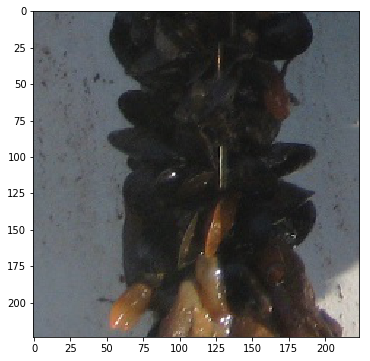

In [13]:
plt.figure(figsize=(6,6))
plt.imshow(image)

## Display a segmentation mask (blue is 'common blue mussel', green is 'Ciona', white is 'VOID')

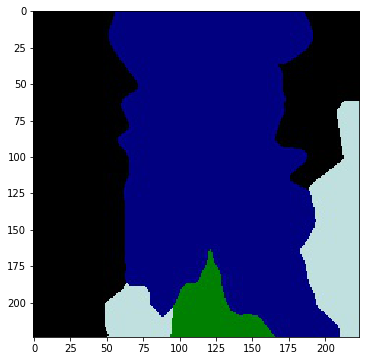

In [14]:
plt.figure(figsize=(6,6))
plt.imshow(mask)

# Image Filtering

In [19]:
from scipy import ndimage # image processing of n-dimensional images
from scipy import misc

## Smoothing

In [52]:
smooth_image = ndimage.gaussian_filter(image, sigma=3)

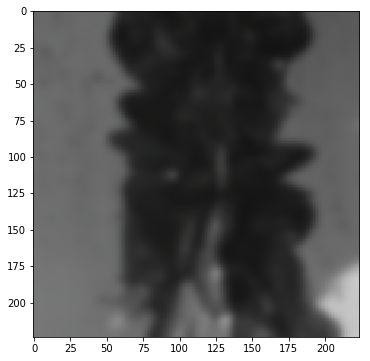

In [53]:
# the filter washes out our colour! Set sigma to one to restore colour.
plt.figure(figsize=(6,6))
plt.imshow(smooth_image)

In [54]:
smooth_image.shape

(224, 224, 3)

## Sharpening

Text(0.5,1,'Sharpened original')

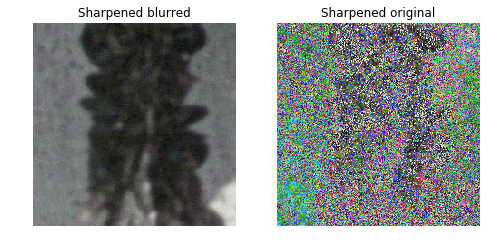

In [57]:
filter_smoothed_f = ndimage.gaussian_filter(smooth_image, 1)
filter_original_f = ndimage.gaussian_filter(image, 1)
alpha = 30

sharpened_smooth = smooth_image + alpha * (smooth_image - filter_smoothed_f)
sharpened_original = image + alpha * (image - filter_original_f)

# display
'''
plt.figure(figsize=(6,6))
plt.imshow(sharpened)

plt.figure(figsize=(6,6))
plt.imshow(sharpened_original)
'''
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(121)  # left side
ax1.imshow(sharpened)
ax1.set_axis_off()
ax1.set_title("Sharpened blurred")

ax2 = fig.add_subplot(122)  # right side
ax2.imshow(sharpened_original)
ax2.set_axis_off()
ax2.set_title("Sharpened original")

Text(0.5,1,'Median filtered')

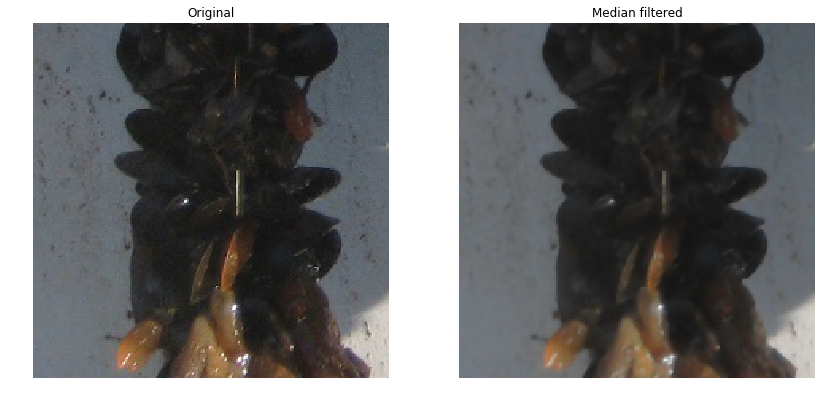

In [61]:
median = ndimage.median_filter(image, 3)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(121)  # left side
ax1.imshow(image)
ax1.set_axis_off()
ax1.set_title("Original")

ax2 = fig.add_subplot(122)  # right side
ax2.imshow(median)
ax2.set_axis_off()
ax2.set_title("Median filtered")

# Feature Extraction

In [150]:
# first with synthetic data
im = np.zeros((256, 256)) # this function takes a tuple for shape
im[64:-64, 64:-64] = 1 # make a big square
im[96:-96, 0:25] = 1 # make a small rectangle

# add some random noise
noise = np.random.randn(im.shape[0], im.shape[1]) / 2# this function does not
im += noise

In [151]:
im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

## Sobel edge detection

In [140]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

## Canny edge detection

In [141]:
from skimage.feature import canny
canny_edges = canny(im, sigma=5)

Text(0.5,1,'Canny filter')

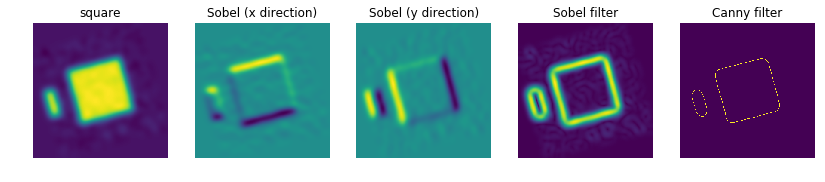

In [142]:
fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(im)
ax1.set_axis_off()
ax1.set_title("square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")

### Turn up the noise!

In [156]:
# Add MORE noise (we don't Gaussian blur it out this time)
noise = np.random.randn(im.shape[0], im.shape[1]) / 2
im += noise

Text(0.5,1,'Canny filter')

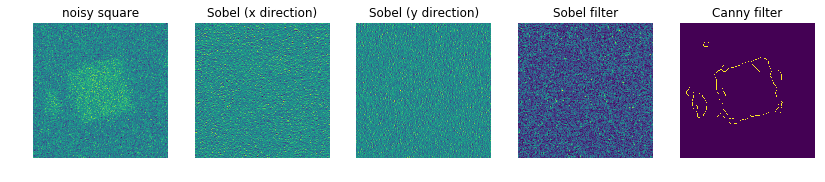

In [157]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)
canny_edges = canny(im, sigma=5)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(im)
ax1.set_axis_off()
ax1.set_title("noisy square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")

The canny filter performs much better against added noise ...

## Segmentation

In [159]:
hist, bin_edges = np.histogram(image, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

Text(0,0.5,'frequency')

/export/mlrg/gallowaa/anaconda2/envs/tf140-py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


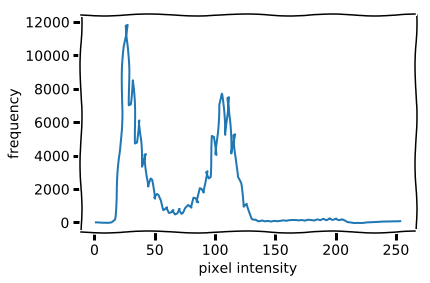

In [172]:
plt.xkcd() # might cause a warning "Humor Sans" not found :)
plt.plot(bin_centers, hist)
plt.xlabel('pixel intensity')
plt.ylabel('frequency')

In [176]:
image_thresh = image.copy() # make a copy so we don't mess up original image
image_thresh[image < 50] = 0

/export/mlrg/gallowaa/anaconda2/envs/tf140-py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


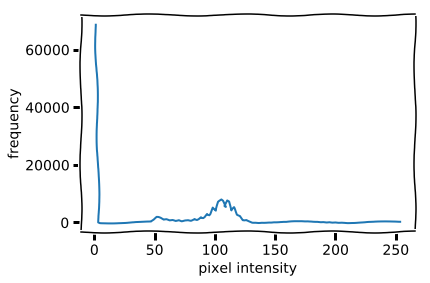

In [182]:
hist, bin_edges = np.histogram(image_thresh, bins=100)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
with plt.xkcd(): # might cause a warning "Humor Sans" not found :)
    plt.plot(bin_centers, hist)
    plt.xlabel('pixel intensity')
    plt.ylabel('frequency')

/export/mlrg/gallowaa/anaconda2/envs/tf140-py35/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


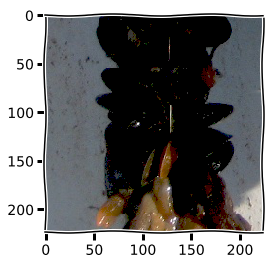

In [183]:
plt.imshow(image_thresh)

In [181]:
plt.xkcd?